In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
pos_cash = pd.read_csv('D:/Data group project DPV/POS_CASH_balance.csv')
app_train = pd.read_csv('D:/Data group project DPV/application_train.csv')

**POS_CASH_balance.csv**

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample.

**POS_CASH_balance.csv FEATURE DESCRIPTION**

SK_ID_PREV: The ID of previous credit in Home Credit related to loan in our sample

SK_ID_CURR: ID of loan in our sample

MONTHS_BALANCE: Month of balance relative to application date

CNT_INSTALMENT: Term of previous credit (can change over time)

CNT_INSTALMENT_FUTURE: Installments left to pay on the previous credit

NAME_CONTRACT_STATUS: Contract status during the month

SK_DPD: DPD (days past due) during the month of previous credit

SK_DPD_DEF: DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit

# POS_CASH_balance_df

In [101]:
pos_cash.head(10)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
5,2207092,342166,-32,12.0,12.0,Active,0,0
6,1110516,204376,-38,48.0,43.0,Active,0,0
7,1387235,153211,-35,36.0,36.0,Active,0,0
8,1220500,112740,-31,12.0,12.0,Active,0,0
9,2371489,274851,-32,24.0,16.0,Active,0,0


In [102]:
pos_cash[pos_cash['SK_ID_CURR'] == 100001]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1261679,1851984,100001,-96,4.0,2.0,Active,0,0
1891462,1851984,100001,-95,4.0,1.0,Active,7,7
2197888,1369693,100001,-53,4.0,0.0,Completed,0,0
4704415,1369693,100001,-54,4.0,1.0,Active,0,0
4928574,1851984,100001,-93,4.0,0.0,Completed,0,0
7167007,1369693,100001,-57,4.0,4.0,Active,0,0
7823681,1369693,100001,-55,4.0,2.0,Active,0,0
8531326,1851984,100001,-94,4.0,0.0,Active,0,0
8789081,1369693,100001,-56,4.0,3.0,Active,0,0


In [103]:
pos_cash.dtypes

SK_ID_PREV                 int64
SK_ID_CURR                 int64
MONTHS_BALANCE             int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS      object
SK_DPD                     int64
SK_DPD_DEF                 int64
dtype: object

In [104]:
pos_cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [105]:
# NUMBER OF NULL VALUES IN EACH COLUMN
pos_cash.isna().sum().sort_values(ascending=False)

CNT_INSTALMENT_FUTURE    26087
CNT_INSTALMENT           26071
SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [106]:
# PERCENTAGE OF NULL VALUES IN EACH COLUMN
(pos_cash.isna().sum() / pos_cash.shape[0]).sort_values(ascending=False)

CNT_INSTALMENT_FUTURE    0.002608
CNT_INSTALMENT           0.002607
SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
MONTHS_BALANCE           0.000000
NAME_CONTRACT_STATUS     0.000000
SK_DPD                   0.000000
SK_DPD_DEF               0.000000
dtype: float64

missing data < 1%

In [107]:
pos_cash.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,10001358.0,1.903217e+06,535846.530722,1000001.0,1434405.0,1896565.0,2368963.0,2843499.0
SK_ID_CURR,10001358.0,2.784039e+05,102763.745090,100001.0,189550.0,278654.0,367429.0,456255.0
MONTHS_BALANCE,10001358.0,-3.501259e+01,26.066570,-96.0,-54.0,-28.0,-13.0,-1.0
CNT_INSTALMENT,9975287.0,1.708965e+01,11.995056,1.0,10.0,12.0,24.0,92.0
CNT_INSTALMENT_FUTURE,9975271.0,1.048384e+01,11.109058,0.0,3.0,7.0,14.0,85.0
SK_DPD,10001358.0,1.160693e+01,132.714043,0.0,0.0,0.0,0.0,4231.0
SK_DPD_DEF,10001358.0,6.544684e-01,32.762491,0.0,0.0,0.0,0.0,3595.0


In [108]:
pos_cash.shape

(10001358, 8)

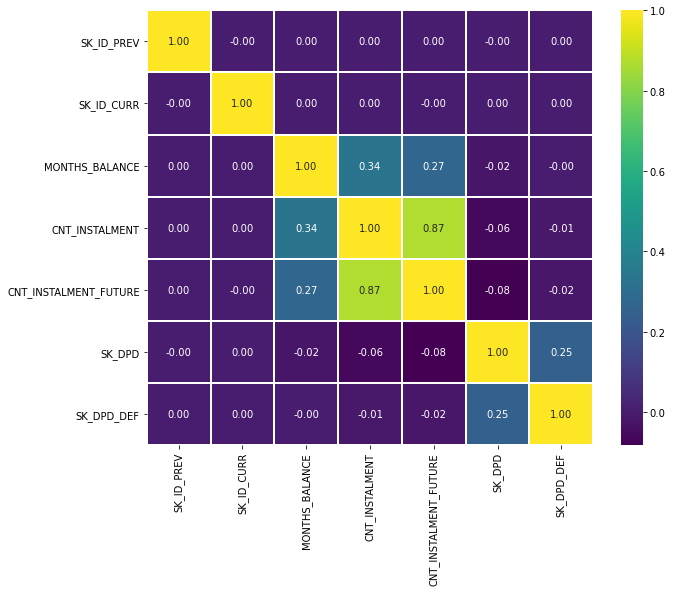

In [109]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(pos_cash.corr(),cmap="viridis", annot = True, fmt = ".2f", linewidths=1, ax=ax)
plt.show()

## **FEATURE ADDED**

In [110]:
pos_cash_update = pd.DataFrame({'SK_ID_CURR': pos_cash['SK_ID_CURR'].unique()})
pos_cash_update

,SK_ID_CURR
0,182943
1,367990
2,397406
3,269225
4,334279
...,...
337247,185413
337248,326688
337249,394310
337250,240059


In [111]:
group_object = pos_cash.groupby('SK_ID_CURR')['CNT_INSTALMENT_FUTURE'].last().reset_index()
group_object.rename(index=str,
                    columns={'CNT_INSTALMENT_FUTURE': 'pos_cash_remaining_installments'},
                    inplace=True)

pos_cash_update = pos_cash_update.merge(group_object, on=['SK_ID_CURR'], how='left')
pos_cash_update.head()

,SK_ID_CURR,pos_cash_remaining_installments
0,182943,5.0
1,367990,4.0
2,397406,0.0
3,269225,24.0
4,334279,2.0


In [112]:
pos_cash['is_contract_status_completed'] = pos_cash['NAME_CONTRACT_STATUS'] == 'Completed'
group_object = pos_cash.groupby(['SK_ID_CURR'])['is_contract_status_completed'].sum().reset_index()
group_object.rename(index=str,
                    columns={'is_contract_status_completed': 'pos_cash_completed_contracts'},
                    inplace=True)
pos_cash_update = pos_cash_update.merge(group_object, on=['SK_ID_CURR'], how='left')

In [113]:
group_object

,SK_ID_CURR,pos_cash_completed_contracts
0,100001,2
1,100002,0
2,100003,2
3,100004,1
4,100005,1
...,...,...
337247,456251,1
337248,456252,1
337249,456253,2
337250,456254,0


In [114]:
pos_cash_update

,SK_ID_CURR,pos_cash_remaining_installments,pos_cash_completed_contracts
0,182943,5.0,1
1,367990,4.0,2
2,397406,0.0,6
3,269225,24.0,5
4,334279,2.0,4
...,...,...,...
337247,185413,NaN,0
337248,326688,6.0,0
337249,394310,12.0,0
337250,240059,0.0,1


In [115]:
X = app_train.merge(pos_cash_update, left_on = ['SK_ID_CURR'], right_on = ['SK_ID_CURR'],
                                how='left',
                                validate = 'one_to_one')
X = X[pos_cash_update.columns.tolist() + ['TARGET']]

In [116]:
X

,SK_ID_CURR,pos_cash_remaining_installments,pos_cash_completed_contracts,TARGET
0,100002,20.0,0.0,1
1,100003,6.0,2.0,0
2,100004,3.0,1.0,0
3,100006,8.0,2.0,0
4,100007,8.0,3.0,0
...,...,...,...,...
307506,456251,6.0,1.0,0
307507,456252,4.0,1.0,0
307508,456253,0.0,2.0,0
307509,456254,9.0,0.0,1


In [117]:
engineered_numerical_columns = list(pos_cash_update.columns)
engineered_numerical_columns.remove('SK_ID_CURR')
credit_eng = X[engineered_numerical_columns + ['TARGET']]
credit_eng_corr = abs(credit_eng.corr())

In [118]:
engineered_numerical_columns

['pos_cash_remaining_installments', 'pos_cash_completed_contracts']

In [119]:
credit_eng

,pos_cash_remaining_installments,pos_cash_completed_contracts,TARGET
0,20.0,0.0,1
1,6.0,2.0,0
2,3.0,1.0,0
3,8.0,2.0,0
4,8.0,3.0,0
...,...,...,...
307506,6.0,1.0,0
307507,4.0,1.0,0
307508,0.0,2.0,0
307509,9.0,0.0,1


In [120]:
credit_eng_corr

,pos_cash_remaining_installments,pos_cash_completed_contracts,TARGET
pos_cash_remaining_installments,1.000000,0.057939,0.015371
pos_cash_completed_contracts,0.057939,1.000000,0.019547
TARGET,0.015371,0.019547,1.000000


In [121]:
credit_eng_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                             1.000000
pos_cash_completed_contracts       0.019547
pos_cash_remaining_installments    0.015371
Name: TARGET, dtype: float64

<AxesSubplot:>

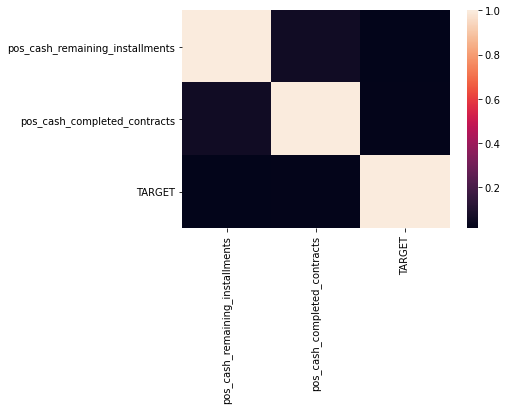

In [122]:
sns.heatmap(credit_eng_corr, 
            xticklabels=credit_eng_corr.columns,
            yticklabels=credit_eng_corr.columns)

In [123]:
pos_cash_update.head()

,SK_ID_CURR,pos_cash_remaining_installments,pos_cash_completed_contracts
0,182943,5.0,1
1,367990,4.0,2
2,397406,0.0,6
3,269225,24.0,5
4,334279,2.0,4


In [124]:
pos_cash_update['pos_cash_paid_late'] = (pos_cash['SK_DPD'] > 0).astype(int)
pos_cash_update['pos_cash_paid_late_with_tolerance'] = (pos_cash['SK_DPD_DEF'] > 0).astype(int)

In [125]:
pos_cash_update

,SK_ID_CURR,pos_cash_remaining_installments,pos_cash_completed_contracts,pos_cash_paid_late,pos_cash_paid_late_with_tolerance
0,182943,5.0,1,0,0
1,367990,4.0,2,0,0
2,397406,0.0,6,0,0
3,269225,24.0,5,0,0
4,334279,2.0,4,0,0
...,...,...,...,...,...
337247,185413,NaN,0,0,0
337248,326688,6.0,0,0,0
337249,394310,12.0,0,0,0
337250,240059,0.0,1,0,0


In [126]:
pos_cash_update.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,337252.0,278163.132678,102877.889290,100001.0,189046.75,278241.5,367320.25,456255.0
pos_cash_remaining_installments,337224.0,7.187119,8.029813,0.0,2.00,5.0,10.00,69.0
pos_cash_completed_contracts,337252.0,2.208684,3.166348,0.0,1.00,2.0,3.00,86.0
pos_cash_paid_late,337252.0,0.014829,0.120867,0.0,0.00,0.0,0.00,1.0
pos_cash_paid_late_with_tolerance,337252.0,0.009779,0.098404,0.0,0.00,0.0,0.00,1.0


### **Những feature được tạo thêm**

**pos_cash_remaining_installments:** số khoản vay còn phải trả

**pos_cash_completed_contracts:** số khoản vay đã được hoàn thành

**pos_cash_paid_late:** trả chậm, có = 1, không chậm = 0

**pos_cash_paid_late_with_tolerance:** khoản trả chậm có được chấp nhận
